In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the data
data=pd.read_csv("C:\\Users\\Madhusmita Panda\\Downloads\\blr_real_estate_prices.csv")
data

# here the dataset and it's paths are shows.
# delete a column (availability) using drop .

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
#information about the dataset
print("\n Information about the dataset")
data.info()


 Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.shape

(13320, 9)

In [5]:
# Check categorical values
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n{column} value counts:") # prints the column name followed by "value counts:".
    print(data[column].value_counts())


area_type value counts:
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

availability value counts:
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

location value counts:
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64


In [6]:
# Create a label encoder object
le = LabelEncoder()                 ##LabelEncoder is used to encode the categorical column area_type into numerical values. 
# Convert a categorical column to numeric
data['area_type'] = le.fit_transform(data['area_type'])                                                              
data

#area_type is converted categorical to numeric using labelencoder and fit_transform(fit the data into a model and transform it into a form)

#bhk to numerical value
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0])if isinstance(x, str) and ' ' in x else None)
data        

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...,...
13315,0,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5.0
13316,3,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4.0
13317,0,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0
13318,3,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0


In [7]:
# Convert total_sqft to numeric, handle non-numeric values
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')

# Handle missing values for total_sqft
data['total_sqft'].fillna(data['total_sqft'].median(), inplace=True)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...,...
13315,0,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5.0
13316,3,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00,4.0
13317,0,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2.0
13318,3,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4.0


In [8]:
# Ensure 'area_type' are treated as categorical variables
data['area_type'] = data['area_type'].astype('category')
#Handle missing values if any (optional, depending on your dataset)
#data.dropna(subset=['area_type','price'], inplace=True)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...,...
13315,0,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5.0
13316,3,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00,4.0
13317,0,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2.0
13318,3,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4.0


In [9]:
data = data.drop('availability', axis=1)
data = data.drop('bath', axis=1)
data = data.drop('size',axis = 1)
data = data.drop('society',axis = 1)
data = data.drop('location',axis = 1)
data

,area_type,total_sqft,balcony,price,bhk
0,3,1056.0,1.0,39.07,2.0
1,2,2600.0,3.0,120.00,4.0
2,0,1440.0,3.0,62.00,3.0
3,3,1521.0,1.0,95.00,3.0
4,3,1200.0,1.0,51.00,2.0
...,...,...,...,...,...
13315,0,3453.0,0.0,231.00,5.0
13316,3,3600.0,NaN,400.00,4.0
13317,0,1141.0,1.0,60.00,2.0
13318,3,4689.0,1.0,488.00,4.0


In [10]:
# display missing value
missing_values=data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
area_type       0
total_sqft      0
balcony       609
price           0
bhk            16
dtype: int64


In [11]:
# For categorical columns, you can replace missing values with mode
data['balcony'].fillna(data['balcony'].mode()[0], inplace=True)
data['bhk'].fillna(data['bhk'].mode()[0], inplace=True)

#to fill missing values in categorical columns with the most frequent values that's why use mode()[0].

In [12]:
print("after replacing missing value with zero")
# Display missing values
missing_values=data.isnull().sum(0)    
print("\nMissing_values:")
missing_values

after replacing missing value with zero

Missing_values:


area_type     0
total_sqft    0
balcony       0
price         0
bhk           0
dtype: int64

In [13]:
#check for duplicate data
duplicate_rows=data[data.duplicated()]
print("\n Duplicate rows")
duplicate_rows


 Duplicate rows


,area_type,total_sqft,balcony,price,bhk
156,3,1200.0,2.0,50.00,2.0
242,3,645.0,1.0,16.45,1.0
328,3,1200.0,2.0,52.00,2.0
484,3,1464.0,2.0,56.00,3.0
605,3,12000.0,3.0,2200.00,7.0
...,...,...,...,...,...
13306,2,1200.0,2.0,325.00,4.0
13311,2,1500.0,2.0,250.00,7.0
13313,3,1345.0,1.0,57.00,3.0
13314,3,1715.0,3.0,112.00,3.0


In [14]:
# Drop(delete) duplicate rows
data = data.drop_duplicates()
data          #the output is deleted outputs.

,area_type,total_sqft,balcony,price,bhk
0,3,1056.0,1.0,39.07,2.0
1,2,2600.0,3.0,120.00,4.0
2,0,1440.0,3.0,62.00,3.0
3,3,1521.0,1.0,95.00,3.0
4,3,1200.0,1.0,51.00,2.0
...,...,...,...,...,...
13312,3,1262.0,2.0,47.00,2.0
13315,0,3453.0,0.0,231.00,5.0
13316,3,3600.0,2.0,400.00,4.0
13317,0,1141.0,1.0,60.00,2.0


C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


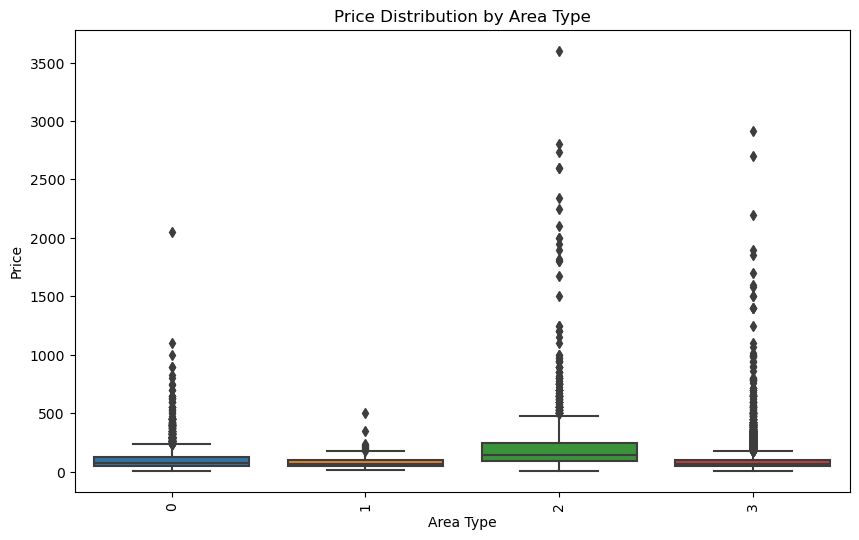

In [15]:
# Plot using the original categorical values
plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=data)
plt.xticks(rotation=90)
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.title('Price Distribution by Area Type')
plt.show()

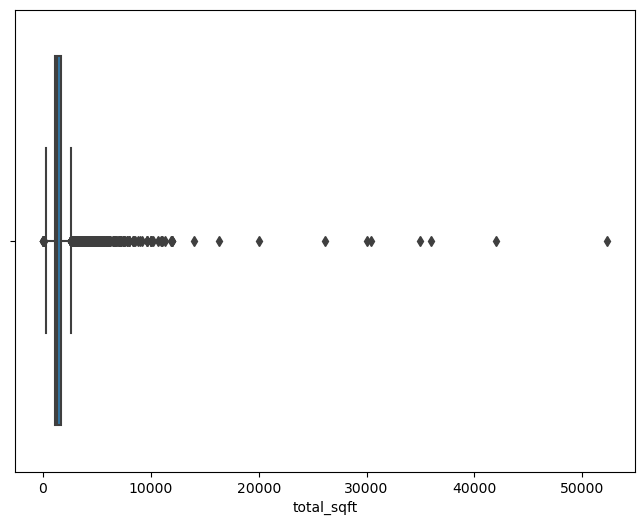

In [16]:
# Check outlier patterns: Visualize data
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_sqft',data=data)
plt.show()

#Uses a boxplot to visualize all numerical columns outliers. the individual points outside the whiskers are the outliers.
#these are the  that are high or low compared to the rest of the dataset.

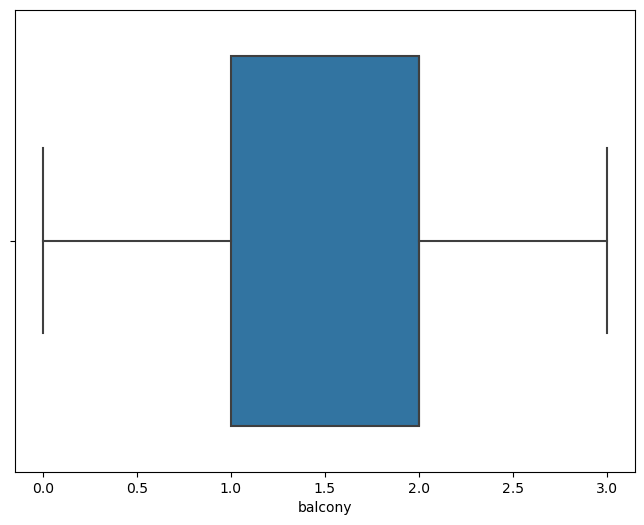

In [17]:
# Check outlier patterns: Visualize data
plt.figure(figsize=(8, 6))
sns.boxplot(x='balcony',data=data)
plt.show()


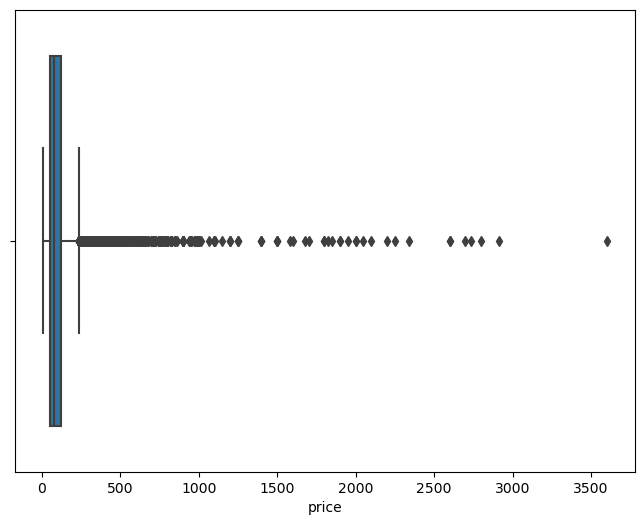

In [18]:
# Check outlier patterns: Visualize data
plt.figure(figsize=(8, 6))
sns.boxplot(x='price',data=data)
plt.show()


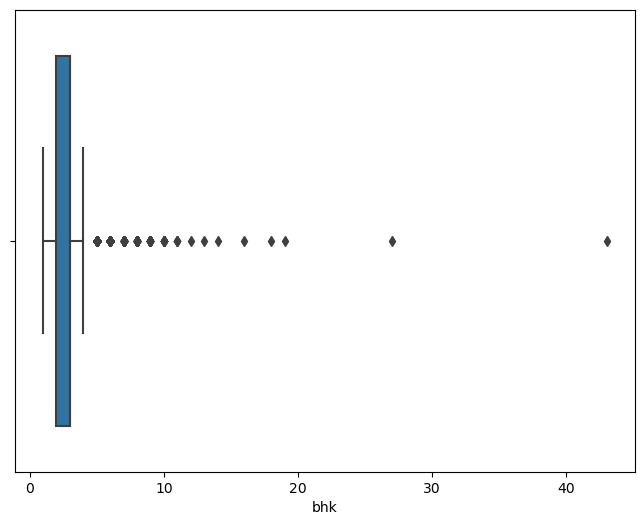

In [19]:
# Check outlier patterns: Visualize data
plt.figure(figsize=(8, 6))
sns.boxplot(x='bhk',data=data)
plt.show()


In [20]:
#identify outliers using the IQR method
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
data=data[numeric_columns]

#Calculating Quartiles and IQR:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1  
#IQR is the Interquartile Range, calculated as the difference between the 75th and 25th percentiles.
#Interquartile range = Upper Quartile – Lower Quartile = Q­3 – Q­1
print(IQR)


outliers=((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).sum()
#A value is considered an outlier if it is less than q1 - 1.5 * IQR or greater than q2 + 1.5 * IQR.
print("Number of outliers in each column:")
print(outliers)

data_filtered=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]
#applying the negated condition to the DataFrame data, you keep only those rows where all values are True (i.e., rows without any outliers)
#.any(axis=1) method is used to check each row to see if there are any True values.
#If a row contains any True value, it indicates that the row has at least one outlier.

data_filtered
data_filtered.to_csv('filtered_real_estate_data.csv', index=False)


total_sqft    595.00
balcony         1.00
price          74.21
bhk             1.00
dtype: float64
Number of outliers in each column:
total_sqft    1065
balcony          0
price         1148
bhk            810
dtype: int64


In [21]:
# Find out meaningful columns: Analyze correlation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
#The select_dtypes method is used to filter columns based on their data types 
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)
# which measures the pairwise correlations between the numeric columns. The resulting correlation matrix is stored in the variable correlation_matrix.

# Calculate the correlation matrix
correlation_matrix = data_filtered[numeric_columns].corr()
relevant_columns = correlation_matrix['price'].sort_values(ascending=False).index
#'correlation_matrix['price']: This selects the column from the correlation matrix that corresponds to 'price'.
#This column contains the correlation coefficients between 'price' and all other numeric columns in the dataset.
print("Most meaningful columns:")
relevant_columns

            total_sqft   balcony     price       bhk
total_sqft    1.000000  0.153680  0.563045  0.331544
balcony       0.153680  1.000000  0.118629  0.186873
price         0.563045  0.118629  1.000000  0.389006
bhk           0.331544  0.186873  0.389006  1.000000
Most meaningful columns:


Index(['price', 'total_sqft', 'bhk', 'balcony'], dtype='object')

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 400x200 with 0 Axes>

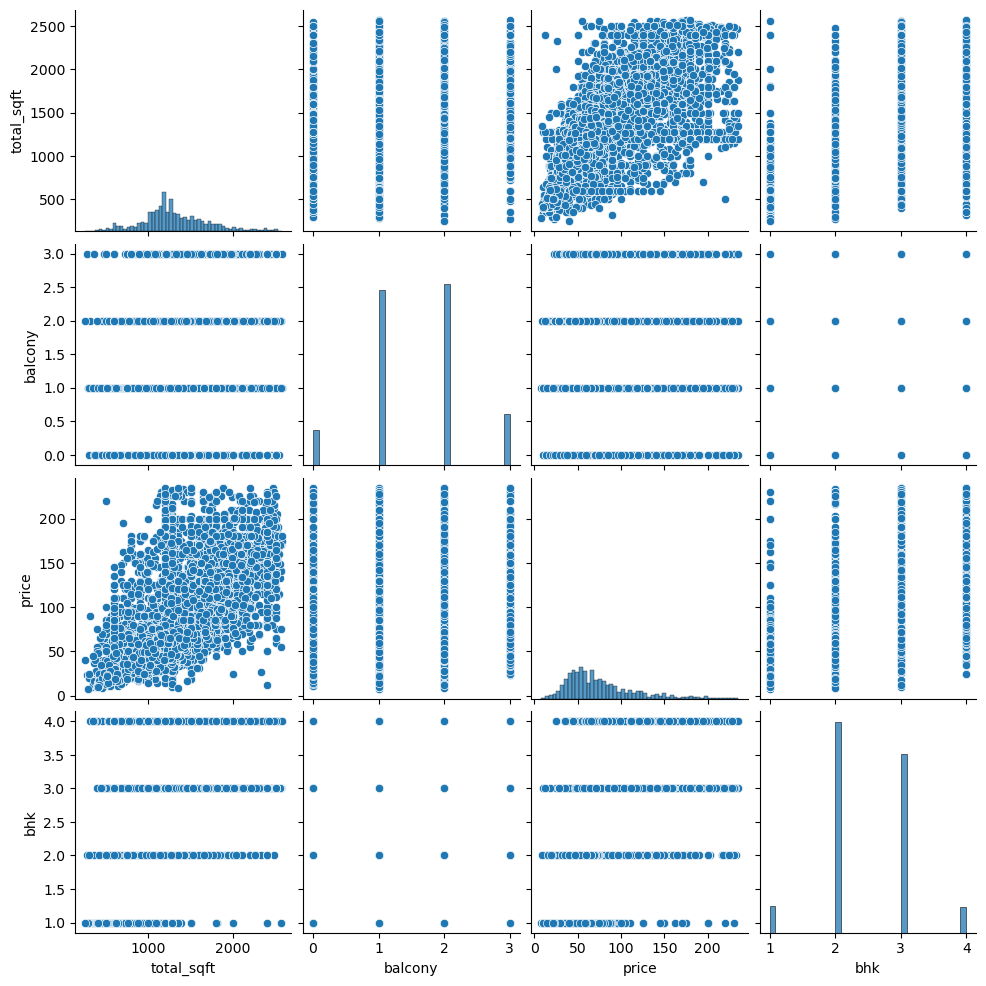

In [22]:
# Identify meaningful patterns: Explore relationship
plt.figure(figsize=(4,2))
sns.pairplot(data_filtered)  
plt.show()

In [23]:
print("\nStatical measures:")
data_filtered.describe()             # here describe all the numeric columns count,mean,std,min,max and percentages(25%,50%,75%).


Statical measures:


,total_sqft,balcony,price,bhk
count,9845.000000,9845.000000,9845.000000,9845.000000
mean,1308.555959,1.561402,76.475316,2.460030
std,389.581743,0.796180,40.965456,0.697671
min,250.000000,0.000000,8.000000,1.000000
25%,1080.000000,1.000000,48.000000,2.000000
50%,1253.000000,2.000000,65.000000,2.000000
75%,1525.000000,2.000000,95.000000,3.000000
max,2569.000000,3.000000,235.000000,4.000000


['total_sqft', 'balcony', 'price', 'bhk']


C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


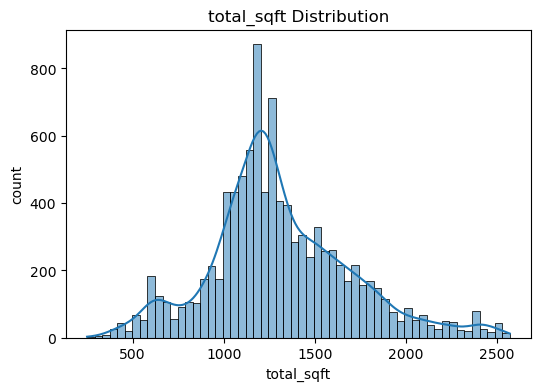

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


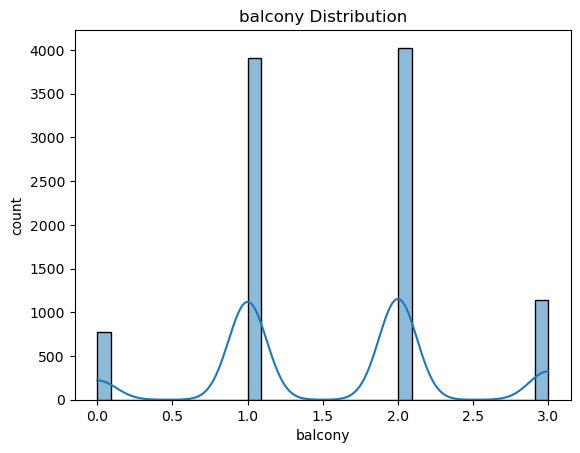

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


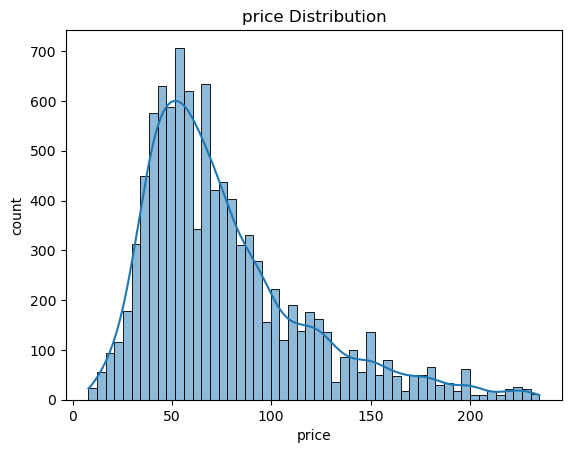

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


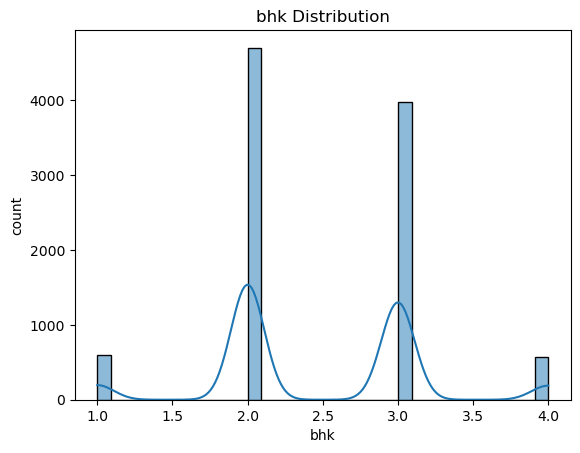

In [24]:
#numerical analysis
numeric_columns = data_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_columns)

plt.figure(figsize=(6, 4))
for column in numeric_columns:
    sns.histplot(data_filtered[column], kde=True,stat='count')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()
#kde=True: Adds a Kernel Density Estimate (KDE) curve to the histogram, which provides a smooth estimate of the distribution.
#stat='count': Sets the y-axis to show the count of observations in each bin.
#histograms visualize the distribution of the data in each column, with an added KDE curve to show the smoothed density of the data. 

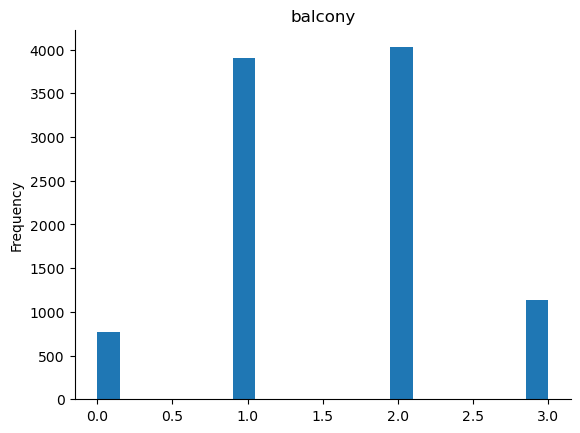

In [25]:

data_filtered['balcony'].plot(kind='hist', bins=20, title='balcony')
plt.gca().spines[['top', 'right',]].set_visible(False)

#plt.gca(): This gets the current Axes instance on the current figure. gca stands for "get current axes".
#.spines[['top', 'right']]: This accesses the top and right spines of the plot. Spines are the lines connecting the axis

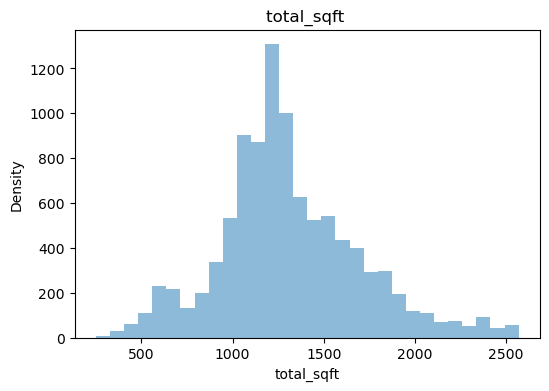

In [26]:
# Define the columns you want to compare
column1 = 'total_sqft'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=False)

# Add labels and title
plt.xlabel('total_sqft')
plt.ylabel('Density')
plt.title('total_sqft ')

# Show the plot
plt.show()

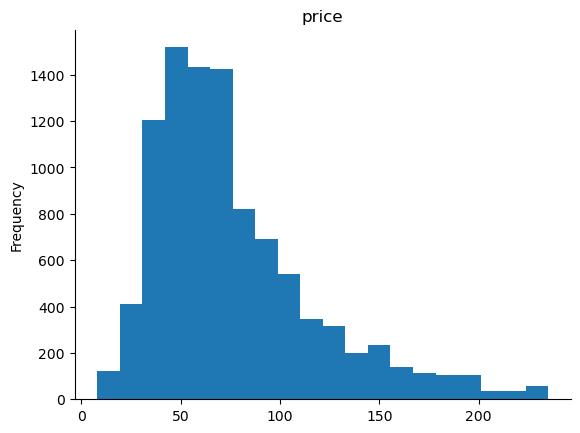

In [28]:
data_filtered['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

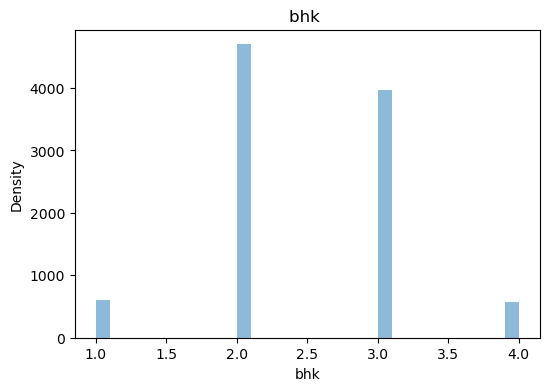

In [30]:
# Define the columns you want to compare
column1 = 'bhk'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=False)

# Add labels and title
plt.xlabel('bhk')
plt.ylabel('Density')
plt.title('bhk ')

# Show the plot
plt.show()

C:\Users\Madhusmita Panda\AppData\Local\Temp\ipykernel_13796\1478045891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bhk'] = data['bhk'].astype('category')
C:\Users\Madhusmita Panda\AppData\Local\Temp\ipykernel_13796\1478045891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('bhk')['price'].plot(kind='hist', alpha=0.5, legend=True, bins=30)


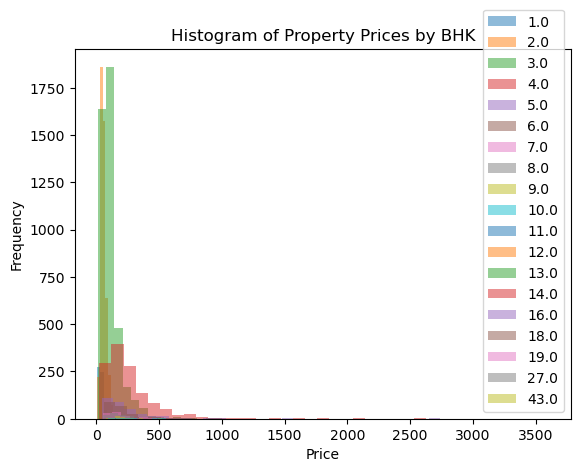

In [31]:
# Ensure 'bhk' is treated as a categorical variable
data['bhk'] = data['bhk'].astype('category')

# Plot histograms of 'price' for each 'bhk' category
data.groupby('bhk')['price'].plot(kind='hist', alpha=0.5, legend=True, bins=30)

# Add titles and labels
plt.title('Histogram of Property Prices by BHK')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Separate features and target
features = data_filtered.iloc[:, :-1]  # All columns except the last one
target = data_filtered.iloc[:, -1]     # The last column

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object', 'category']).columns
numeric_cols = features.select_dtypes(include=['number']).columns

# Preprocessing for numeric data: scaling
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
features_processed = preprocessor.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_processed, target, test_size=0.2, random_state=42)

In [42]:
# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, R²: {r2_lr}')

Linear Regression MSE: 0.2921463101639934, R²: 0.42505357849183856


In [44]:
# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}, R²: {r2_rf}')

Random Forest MSE: 0.277650277257751, R²: 0.45358189446074537


In [47]:
# Train and evaluate Neural Network (MLP)
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f'Neural Network MSE: {mse_nn}, R²: {r2_nn}')

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best parameters found: {grid_search.best_params_}')
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Tuned Random Forest MSE: {mse_best_rf}, R²: {r2_best_rf}')


Neural Network MSE: 0.2404978577345429, R²: 0.526698171860408
Best parameters found: {'max_depth': 10, 'n_estimators': 100}
Tuned Random Forest MSE: 0.23902966744540013, R²: 0.5295875828283638


In [48]:
model = joblib.load("tuned_random_forest_model.pkl", mmap_mode=None)


In [35]:
# # Save the best model
# joblib.dump(best_rf_model, 'tuned_random_forest_model.pkl')

# # Load the saved model
# loaded_rf_model = joblib.load('tuned_random_forest_model.pkl')

In [36]:
# data_filtered.columns

In [37]:
# from sklearn.externals import joblib

# # Load the model from the file
# loaded_model = joblib.load('tuned_random_forest_model.pkl')

# # Use the loaded model to make predictions
# predictions = loaded_model.predict(X_test)


In [38]:
# import joblib

# # Assuming best_rf_model is your trained RandomForestRegressor model
# # and tuned_random_forest_model.pkl is the filename you are saving to
# joblib.dump(best_rf_model, 'tuned_random_forest_model.pkl')

# # Load the model again to test
# loaded_model = joblib.load('tuned_random_forest_model.pkl')
